I think that the RandomForestClassifer will be best on the UNSCALED data, because it weighs the decision trees and gets the pattern from that data.  

I think the RandomForestClassifer will be best on the SCALED data as well for that same reason.

In [1]:
# standard libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

# processing libraries
# from sklearn.model_selection import train_test_split # not needed
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4702 non-null   int64  
 1   index                       4702 non-null   int64  
 2   loan_amnt                   4702 non-null   float64
 3   int_rate                    4702 non-null   float64
 4   installment                 4702 non-null   float64
 5   home_ownership              4702 non-null   object 
 6   annual_inc                  4702 non-null   float64
 7   verification_status         4702 non-null   object 
 8   loan_status                 4702 non-null   object 
 9   pymnt_plan                  4702 non-null   object 
 10  dti                         4702 non-null   float64
 11  delinq_2yrs                 4702 non-null   float64
 12  inq_last_6mths              4702 non-null   float64
 13  open_acc                    4702 

In [7]:
len(train_df) / (len(train_df) + len(test_df))

0.7214784978083165

This means that there is a 70/30 split of the train and test data...worth noting

In [8]:
# look at target
train_df.loan_status.value_counts()

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64

In [9]:
test_df.loan_status.value_counts()

high_risk    2351
low_risk     2351
Name: loan_status, dtype: int64

In [10]:
# Label encode the target
train_df["loan_status"] = [1 if x == "high_risk" else 0 for x in train_df.loan_status]
test_df["loan_status"] = [1 if x == "high_risk" else 0 for x in test_df.loan_status]

In [11]:
train_df.loan_status.value_counts()

0    6090
1    6090
Name: loan_status, dtype: int64

In [12]:
test_df.loan_status.value_counts()

0    2351
1    2351
Name: loan_status, dtype: int64

In [13]:
category_df = train_df.select_dtypes(include='object')
category_df.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [14]:
for col in category_df.columns:
    print(category_df[col].value_counts())
    print()

MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

n    12180
Name: pymnt_plan, dtype: int64

w    11158
f     1022
Name: initial_list_status, dtype: int64

Individual    10400
Joint App      1780
Name: application_type, dtype: int64

N    11832
Y      348
Name: hardship_flag, dtype: int64

N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [15]:
cat_df2 = test_df.select_dtypes(include='object')
for col in cat_df2.columns:
    print(cat_df2[col].value_counts())
    print()

MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64

Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64

n    4702
Name: pymnt_plan, dtype: int64

w    4377
f     325
Name: initial_list_status, dtype: int64

Individual    4165
Joint App      537
Name: application_type, dtype: int64

N    4621
Y      81
Name: hardship_flag, dtype: int64

N    4702
Name: debt_settlement_flag, dtype: int64



In [16]:
train_df_cat = pd.get_dummies(category_df)
test_df_cat = pd.get_dummies(cat_df2)

In [17]:
train_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   home_ownership_ANY                   12180 non-null  uint8
 1   home_ownership_MORTGAGE              12180 non-null  uint8
 2   home_ownership_OWN                   12180 non-null  uint8
 3   home_ownership_RENT                  12180 non-null  uint8
 4   verification_status_Not Verified     12180 non-null  uint8
 5   verification_status_Source Verified  12180 non-null  uint8
 6   verification_status_Verified         12180 non-null  uint8
 7   pymnt_plan_n                         12180 non-null  uint8
 8   initial_list_status_f                12180 non-null  uint8
 9   initial_list_status_w                12180 non-null  uint8
 10  application_type_Individual          12180 non-null  uint8
 11  application_type_Joint App           12180 non-null  u

In [18]:
test_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   home_ownership_ANY                   4702 non-null   uint8
 1   home_ownership_MORTGAGE              4702 non-null   uint8
 2   home_ownership_OWN                   4702 non-null   uint8
 3   home_ownership_RENT                  4702 non-null   uint8
 4   verification_status_Not Verified     4702 non-null   uint8
 5   verification_status_Source Verified  4702 non-null   uint8
 6   verification_status_Verified         4702 non-null   uint8
 7   pymnt_plan_n                         4702 non-null   uint8
 8   initial_list_status_f                4702 non-null   uint8
 9   initial_list_status_w                4702 non-null   uint8
 10  application_type_Individual          4702 non-null   uint8
 11  application_type_Joint App           4702 non-null   uin

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  int64  
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [20]:
num_train_df = train_df.select_dtypes(include=['float64', 'int64'])
train_df_real = pd.merge(num_train_df, train_df_cat, left_index=True, right_index=True)

train_df_real.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [21]:
num_train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [22]:
num_test_df = test_df.select_dtypes(include=['float64', 'int64'])
test_df_real = pd.merge(num_test_df, test_df_cat, left_index=True, right_index=True)

test_df_real.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [23]:
for col in train_df_real.columns:
    if col not in test_df_real.columns:
        print(col)
        test_df_real[col] = 0

debt_settlement_flag_Y


In [24]:
train_df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           12180 non-null  int64  
 1   index                                12180 non-null  int64  
 2   loan_amnt                            12180 non-null  float64
 3   int_rate                             12180 non-null  float64
 4   installment                          12180 non-null  float64
 5   annual_inc                           12180 non-null  float64
 6   loan_status                          12180 non-null  int64  
 7   dti                                  12180 non-null  float64
 8   delinq_2yrs                          12180 non-null  float64
 9   inq_last_6mths                       12180 non-null  float64
 10  open_acc                             12180 non-null  float64
 11  pub_rec                     

In [25]:
np.sqrt(len(train_df_real))

110.36303729057116

In [26]:
test_df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 95 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4702 non-null   int64  
 1   index                                4702 non-null   int64  
 2   loan_amnt                            4702 non-null   float64
 3   int_rate                             4702 non-null   float64
 4   installment                          4702 non-null   float64
 5   annual_inc                           4702 non-null   float64
 6   loan_status                          4702 non-null   int64  
 7   dti                                  4702 non-null   float64
 8   delinq_2yrs                          4702 non-null   float64
 9   inq_last_6mths                       4702 non-null   float64
 10  open_acc                             4702 non-null   float64
 11  pub_rec                       

In [27]:
drop_columns = ['Unnamed: 0', 'index', "pymnt_plan_n"]

train_df_real.drop(drop_columns, axis=1, inplace=True)
test_df_real.drop(drop_columns, axis=1, inplace=True)

In [28]:
X_train = train_df_real.drop("loan_status", axis=1)
y_train = train_df_real.loan_status

X_test = test_df_real.drop("loan_status", axis=1)
y_test = test_df_real.loan_status

In [29]:
np.sqrt(len(X_train))

110.36303729057116

In [30]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [31]:
X_test.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

# Data Models

C:\Users\xengo\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.6493431855500821
Testing Score: 0.5157379838366652

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.38      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702


CONFUSION MATRIX:
[[1719  632]
 [1645  706]]


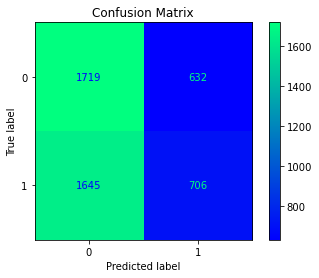

In [32]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))



plot_confusion_matrix(lr, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.9990968801313629
Testing Score: 0.6125053168864313

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.66      0.46      0.54      2351
           1       0.59      0.76      0.66      2351

    accuracy                           0.61      4702
   macro avg       0.62      0.61      0.60      4702
weighted avg       0.62      0.61      0.60      4702


CONFUSION MATRIX:
[[1091 1260]
 [ 562 1789]]


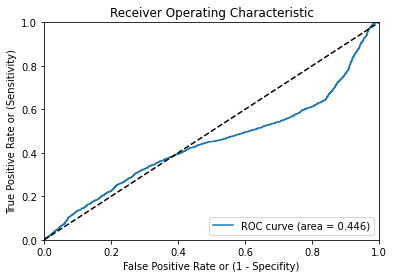

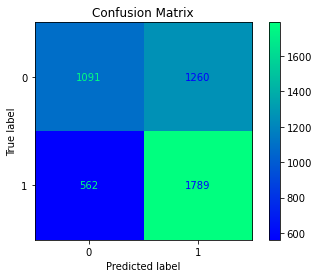

In [33]:
rf = RandomForestClassifier(random_state=12, n_estimators=25)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = lr.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(rf, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

## Scale

In [34]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\xengo\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.7078817733990148
Testing Score: 0.767333049766057

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2351
           1       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702


CONFUSION MATRIX:
[[1819  532]
 [ 562 1789]]


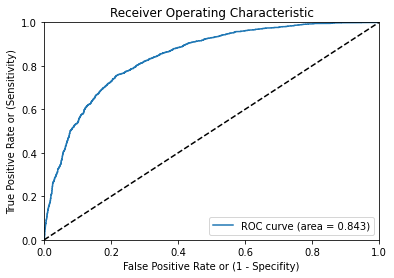

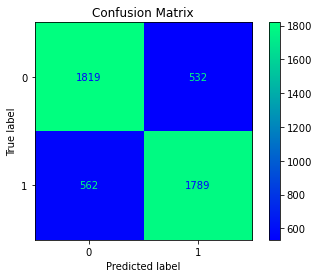

In [35]:
lr = LogisticRegression()
lr = lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(lr, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.9989326765188834
Testing Score: 0.6269672479795831

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.64      0.63      0.62      4702
weighted avg       0.64      0.63      0.62      4702


CONFUSION MATRIX:
[[1101 1250]
 [ 504 1847]]


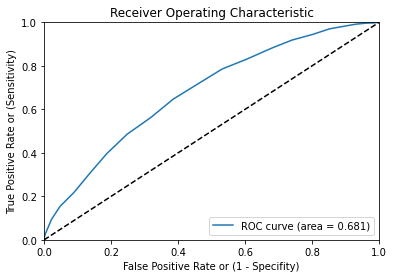

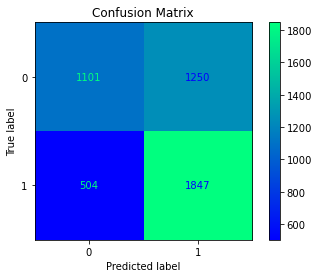

In [36]:
rf = RandomForestClassifier(random_state=32, n_estimators=25)
rf = rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(rf, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

As we have seen from the data, the RandomForestClassifier is better in predicting high risk and low risk in the unscaled data which matches my hypothesis. However, my hypothesis for scaled data was incorrect because the Logistic Regression is better at predicting both high risk and low risk customers, and seems to suffer from less overfitting. With that being said, both models are still not great at predicting high risk and low risk applicants overall, so I am going to run both the scaled and unscaled data through the extratrees, decision trees, ada boost, xgb and lgbm classifier models to see which one has the is the most accurate for our dataset.

# Unscaled Data

Training Score: 1.0
Testing Score: 0.5344534240748617

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47      2351
           1       0.53      0.65      0.58      2351

    accuracy                           0.53      4702
   macro avg       0.54      0.53      0.53      4702
weighted avg       0.54      0.53      0.53      4702


CONFUSION MATRIX:
[[ 974 1377]
 [ 812 1539]]


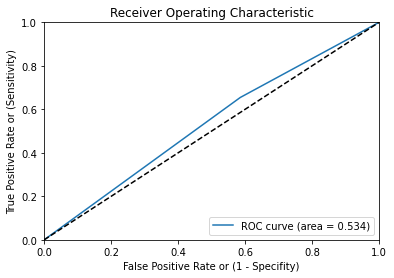

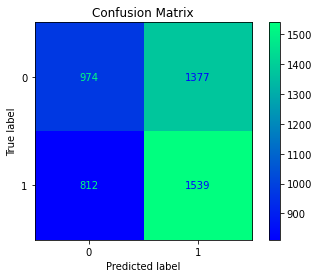

In [37]:
dt = DecisionTreeClassifier(random_state=12)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'Training Score: {dt.score(X_train, y_train)}')
print(f'Testing Score: {dt.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = dt.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(dt, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 1.0
Testing Score: 0.5625265844321565

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      2351
           1       0.56      0.61      0.58      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.56      4702
weighted avg       0.56      0.56      0.56      4702


CONFUSION MATRIX:
[[1216 1135]
 [ 922 1429]]


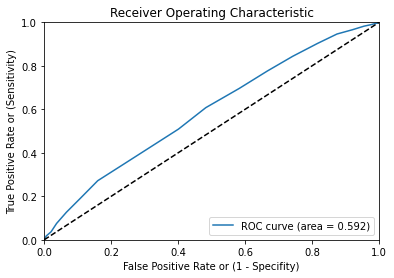

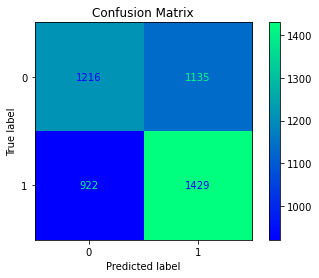

In [38]:
etc = ExtraTreesClassifier(random_state=12, n_estimators=25)
etc = etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

print(f'Training Score: {etc.score(X_train, y_train)}')
print(f'Testing Score: {etc.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = etc.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(etc, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.7504926108374385
Testing Score: 0.7165036154827733

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2351
           1       0.70      0.76      0.73      2351

    accuracy                           0.72      4702
   macro avg       0.72      0.72      0.72      4702
weighted avg       0.72      0.72      0.72      4702


CONFUSION MATRIX:
[[1579  772]
 [ 561 1790]]


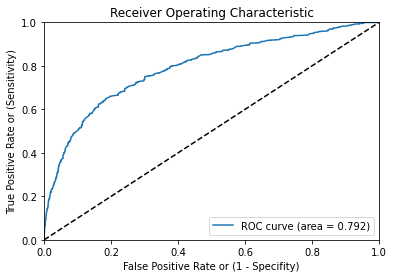

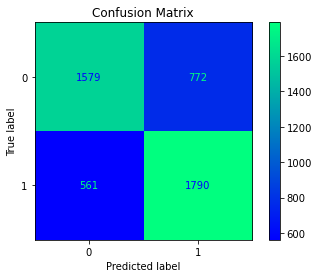

In [39]:
ada = AdaBoostClassifier(random_state=12, n_estimators=25)
ada = ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print(f'Training Score: {ada.score(X_train, y_train)}')
print(f'Testing Score: {ada.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = ada.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(ada, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

C:\Users\xengo\anaconda4\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.8624794745484401
Testing Score: 0.5772011909825606

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      2351
           1       0.57      0.64      0.60      2351

    accuracy                           0.58      4702
   macro avg       0.58      0.58      0.58      4702
weighted avg       0.58      0.58      0.58      4702


CONFUSION MATRIX:
[[1211 1140]
 [ 848 1503]]


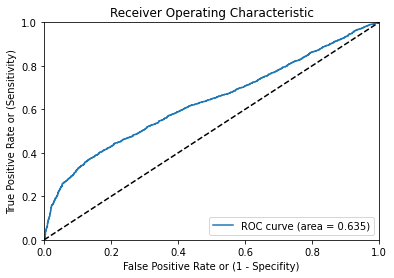

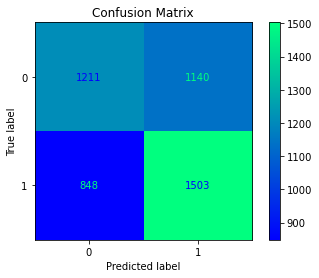

In [40]:
xgb = XGBClassifier(random_state=12, n_estimators=25)
xgb = xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(f'Training Score: {xgb.score(X_train, y_train)}')
print(f'Testing Score: {xgb.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = xgb.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(xgb, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.8175697865353038
Testing Score: 0.5691195236069757

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54      2351
           1       0.56      0.64      0.60      2351

    accuracy                           0.57      4702
   macro avg       0.57      0.57      0.57      4702
weighted avg       0.57      0.57      0.57      4702


CONFUSION MATRIX:
[[1177 1174]
 [ 852 1499]]


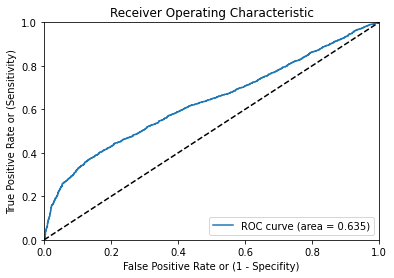

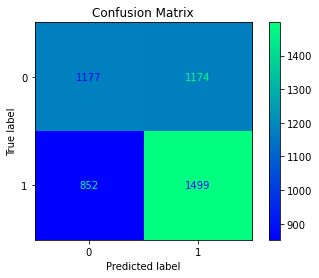

In [41]:
lgb = LGBMClassifier(random_state=12, n_estimators=25)
lgb = lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)

print(f'Training Score: {lgb.score(X_train, y_train)}')
print(f'Testing Score: {lgb.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = xgb.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(lgb, X_test, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

# Scaled

Training Score: 1.0
Testing Score: 0.5455125478519779

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.56      0.41      0.47      2351
           1       0.54      0.68      0.60      2351

    accuracy                           0.55      4702
   macro avg       0.55      0.55      0.54      4702
weighted avg       0.55      0.55      0.54      4702


CONFUSION MATRIX:
[[ 958 1393]
 [ 744 1607]]


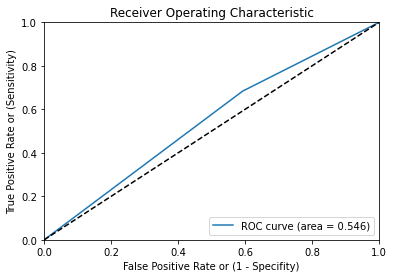

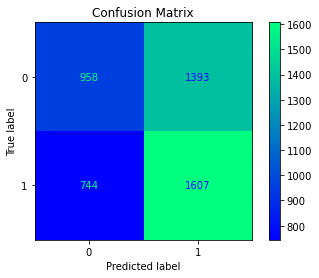

In [42]:
dt = DecisionTreeClassifier(random_state=32)
dt = dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(dt, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 1.0
Testing Score: 0.5710336027222459

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      2351
           1       0.56      0.62      0.59      2351

    accuracy                           0.57      4702
   macro avg       0.57      0.57      0.57      4702
weighted avg       0.57      0.57      0.57      4702


CONFUSION MATRIX:
[[1223 1128]
 [ 889 1462]]


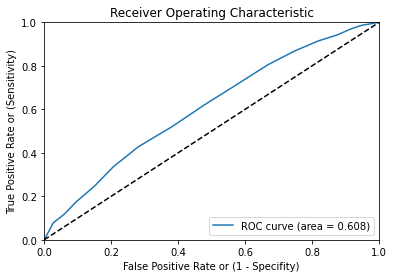

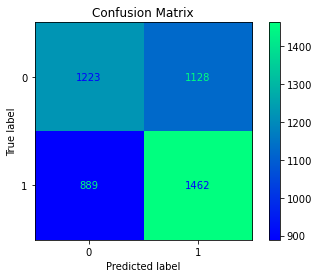

In [43]:
etc = ExtraTreesClassifier(random_state=32, n_estimators=25)
etc = etc.fit(X_train_scaled, y_train)

y_pred = etc.predict(X_test_scaled)

print(f'Training Score: {etc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {etc.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = etc.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(etc, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.7504926108374385
Testing Score: 0.7165036154827733

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      2351
           1       0.70      0.76      0.73      2351

    accuracy                           0.72      4702
   macro avg       0.72      0.72      0.72      4702
weighted avg       0.72      0.72      0.72      4702


CONFUSION MATRIX:
[[1579  772]
 [ 561 1790]]


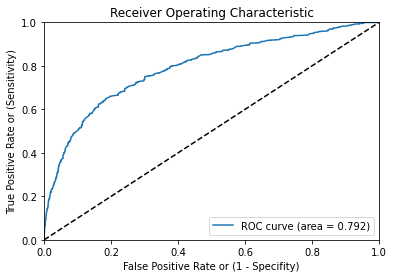

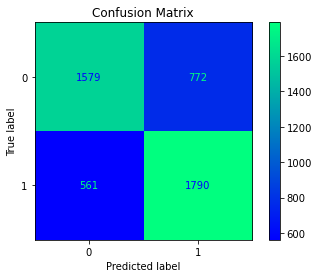

In [44]:
ada = AdaBoostClassifier(random_state=32, n_estimators=25)
ada = ada.fit(X_train_scaled, y_train)

y_pred = ada.predict(X_test_scaled)

print(f'Training Score: {ada.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ada.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = ada.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(ada, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

C:\Users\xengo\anaconda4\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.8624794745484401
Testing Score: 0.5772011909825606

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55      2351
           1       0.57      0.64      0.60      2351

    accuracy                           0.58      4702
   macro avg       0.58      0.58      0.58      4702
weighted avg       0.58      0.58      0.58      4702


CONFUSION MATRIX:
[[1211 1140]
 [ 848 1503]]


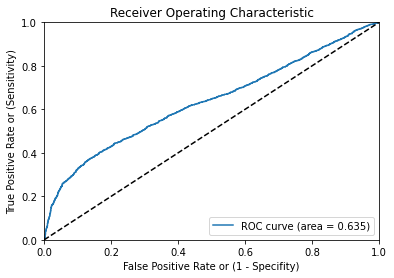

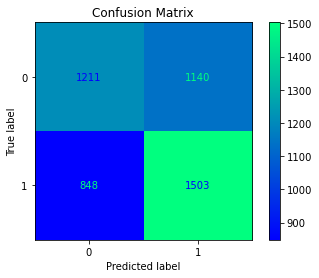

In [45]:
xgb = XGBClassifier(random_state=32, n_estimators=25)
xgb = xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)

print(f'Training Score: {xgb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {xgb.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(xgb, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

Training Score: 0.8164203612479475
Testing Score: 0.6463207145895363

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      2351
           1       0.61      0.78      0.69      2351

    accuracy                           0.65      4702
   macro avg       0.66      0.65      0.64      4702
weighted avg       0.66      0.65      0.64      4702


CONFUSION MATRIX:
[[1195 1156]
 [ 507 1844]]


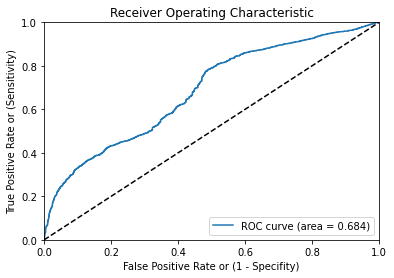

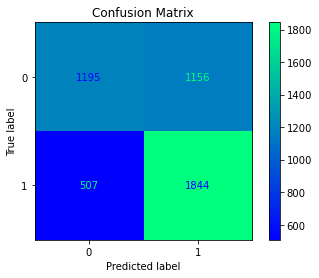

In [46]:
lgb = LGBMClassifier(random_state=32, n_estimators=25)
lgb = lgb.fit(X_train_scaled, y_train)

y_pred = lgb.predict(X_test_scaled)

print(f'Training Score: {lgb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lgb.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
y_proba = lgb.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plot_confusion_matrix(lgb, X_test_scaled, y_test, cmap="winter")
plt.title("Confusion Matrix")
plt.show()

When running the other models we find that the Ada boost model performs well on both the unscaled and scaled datasets. It's the best performing model besides the LogisticRegression model on the scaled data. I want to see the feature importance of classifiers, not needed but I'm curious about that after running all of these models. 

In [47]:
fi = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,last_pymnt_amnt,0.097267
1,total_rec_prncp,0.048929
2,total_rec_int,0.048785
3,total_pymnt_inv,0.045849
4,total_pymnt,0.042191
5,int_rate,0.031602
6,out_prncp,0.030629
7,out_prncp_inv,0.030591
8,installment,0.029434
9,max_bal_bc,0.017920


In [48]:
fi = pd.DataFrame(list(zip(X_train.columns, dt.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,last_pymnt_amnt,0.158559
1,total_rec_prncp,0.117974
2,total_rec_int,0.087603
3,installment,0.056500
4,total_rec_late_fee,0.028775
5,out_prncp,0.024914
6,total_pymnt_inv,0.023716
7,dti,0.022907
8,mo_sin_old_rev_tl_op,0.020287
9,mo_sin_old_il_acct,0.019387


In [49]:
fi = pd.DataFrame(list(zip(X_train.columns, etc.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,int_rate,0.040131
1,last_pymnt_amnt,0.039975
2,total_rec_int,0.035910
3,total_pymnt_inv,0.030306
4,total_rec_prncp,0.027052
5,total_pymnt,0.026960
6,installment,0.020892
7,out_prncp_inv,0.020857
8,out_prncp,0.019740
9,loan_amnt,0.014591


In [50]:
fi = pd.DataFrame(list(zip(X_train.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,total_rec_int,0.24
1,total_rec_prncp,0.24
2,installment,0.20
3,last_pymnt_amnt,0.08
4,total_rec_late_fee,0.04
5,out_prncp,0.04
6,mo_sin_old_il_acct,0.04
7,mths_since_recent_inq,0.04
8,max_bal_bc,0.04
9,acc_open_past_24mths,0.04


In [51]:
fi = pd.DataFrame(list(zip(X_train.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,last_pymnt_amnt,0.088533
1,total_rec_late_fee,0.077297
2,total_rec_int,0.066708
3,total_rec_prncp,0.058218
4,installment,0.037828
5,out_prncp_inv,0.030301
6,total_pymnt_inv,0.025337
7,hardship_flag_N,0.024837
8,total_pymnt,0.021835
9,inq_last_6mths,0.018626


In [52]:
fi = pd.DataFrame(list(zip(X_train.columns, lgb.feature_importances_)), columns=["Feature", "Importance"])
fi = fi.sort_values(by="Importance", ascending=False).reset_index(drop=True)
fi.head(10)

,Feature,Importance
0,total_rec_prncp,116
1,last_pymnt_amnt,112
2,installment,98
3,total_pymnt,56
4,out_prncp,54
5,total_rec_int,43
6,total_rec_late_fee,38
7,int_rate,28
8,out_prncp_inv,19
9,loan_amnt,18


In [53]:
# Convert categorical data to numeric and separate target feature for training data

In [54]:
# Convert categorical data to numeric and separate target feature for testing data

In [55]:
# add missing dummy variables to testing set

In [56]:
# Train the Logistic Regression model on the unscaled data and print the model score

In [57]:
# Train a Random Forest Classifier model and print the model score

In [58]:
# Scale the data

In [59]:
# Train the Logistic Regression model on the scaled data and print the model score

In [60]:
# Train a Random Forest Classifier model on the scaled data and print the model score